#ML_Clustering_Assignment
##Theoretical Questions

**Q1. What is unsupervised learning in the context of machine learning?**

Answer:
Unsupervised learning is a type of machine learning where the model is trained on data without labeled outcomes (i.e., no predefined target variable). The algorithm tries to uncover hidden patterns, structures, or groupings within the data. Common techniques include clustering (K-Means, DBSCAN, Hierarchical Clustering) and dimensionality reduction (PCA, t-SNE).

**Q2. How does K-Means clustering algorithm work?**

Answer:

Choose the number of clusters k.

Randomly initialize k centroids (or use K-Means++).

Assign each data point to the nearest centroid (forming clusters).

Recalculate centroids as the mean of all points in a cluster.

Repeat steps 3–4 until centroids stop changing (convergence).

In [1]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1,2],[1,4],[1,0],[10,2],[10,4],[10,0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.cluster_centers_)


[1 1 1 0 0 0]
[[10.  2.]
 [ 1.  2.]]


**Q3. Explain the concept of a dendrogram in hierarchical clustering.**

Answer:
A dendrogram is a tree-like diagram showing how clusters are merged (agglomerative) or split (divisive) step by step. The x-axis represents individual data points, while the y-axis represents the distance (similarity/dissimilarity) at which clusters are combined. Cutting the dendrogram at a chosen height gives the desired number of clusters.

**Q4. What is the main difference between K-Means and Hierarchical Clustering?**

Answer:

K-Means: Partitional, requires predefined number of clusters k, efficient on large datasets.

Hierarchical: Builds a hierarchy of clusters, does not require specifying k upfront (you can cut the dendrogram later), but is computationally more expensive.

**Q5. What are the advantages of DBSCAN over K-Means?**

Answer:

Can find clusters of arbitrary shape (not just spherical).

Does not require specifying the number of clusters beforehand.

Identifies noise points (outliers).

Works better with clusters of different densities.

**Q6. When would you use Silhouette Score in clustering?**

Answer:
Silhouette Score measures how well each point fits within its cluster compared to other clusters. It ranges from -1 to +1.

+1 → well-clustered.

0 → overlapping clusters.

-1 → misclassified.
Use it to evaluate clustering quality and compare different clustering algorithms or values of k.

**Q7. What are the limitations of Hierarchical Clustering?**

Answer:

Computationally expensive (O(n²) or worse).

Sensitive to noise and outliers.

Once merged or split, clusters cannot be undone.

Not scalable for very large datasets.

**Q8. Why is feature scaling important in clustering algorithms like K-Means?**

Answer:
K-Means uses Euclidean distance. If features are on different scales, higher-valued features dominate distance calculations, leading to biased clusters. Standardization (Z-score) or normalization (MinMax) ensures fair contribution from all features.

Q9. How does DBSCAN identify noise points?

Answer:
DBSCAN marks a point as noise if it is not:

A core point (not enough neighbors within eps distance), and not reachable from any core point.

Q10. Define inertia in the context of K-Means.

Answer:
Inertia = sum of squared distances between each data point and its assigned cluster centroid. It measures compactness of clusters (lower is better).

Q11. What is the elbow method in K-Means clustering?

Answer:
The elbow method helps determine the optimal k.

Plot inertia vs. number of clusters k.

At first, inertia decreases rapidly. After a certain point, the reduction slows, forming an "elbow."

That elbow point is the best trade-off between cluster compactness and complexity.

**Q12. Describe the concept of "density" in DBSCAN.**

Answer:
In DBSCAN, density refers to the number of points within a given radius (eps). If a point has at least minPts neighbors in that radius, it is considered a core point. Clusters are formed by connecting dense regions.

**Q13. Can hierarchical clustering be used on categorical data?**

Answer:
Yes, but with caution. You need to use appropriate distance measures like Hamming distance, Jaccard similarity, or Gower’s distance instead of Euclidean distance. Direct application of standard hierarchical clustering may not work well.

**Q14. What does a negative Silhouette Score indicate?**

Answer:
It indicates that a point is likely assigned to the wrong cluster because it is closer (on average) to points in another cluster than to its own cluster.

Q15. Explain the term "linkage criteria" in hierarchical clustering.

Answer:
Linkage criteria determine how the distance between clusters is computed:

Single linkage: Minimum distance between points in clusters.

Complete linkage: Maximum distance between points.

Average linkage: Average distance between points.

Ward’s method: Minimize variance increase when merging.

**Q16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?**

Answer:
Because K-Means assumes clusters are:

Spherical,

Of similar size and density.
It fails when clusters have different shapes/densities, or if there are outliers.

**Q17. What are the core parameters in DBSCAN, and how do they influence clustering?**

Answer:

eps (ε): Neighborhood radius. Larger values → bigger clusters.

minPts: Minimum number of points required to form a dense region. Larger values → stricter core points.

Together, they control cluster compactness and ability to detect noise.

Q18. How does K-Means++ improve upon standard K-Means initialization?

Answer:
Instead of random initialization, K-Means++ spreads initial centroids apart. This reduces the chance of poor clustering due to bad initial positions, improves convergence, and often yields better results.

**Q19. What is agglomerative clustering?**

Answer:
It is a bottom-up hierarchical method:

Start with each data point as its own cluster.

Iteratively merge the closest clusters based on a linkage criterion.

Continue until all points are in a single cluster (or until a cutoff is chosen).

**Q20. What makes Silhouette Score a better metric than just inertia for model evaluation?**

Answer:

Inertia only measures compactness (within-cluster similarity).

Silhouette Score considers both cohesion (within cluster) and separation (between clusters).
Thus, Silhouette Score provides a more balanced evaluation of clustering quality.

##Practical Questions


Q21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

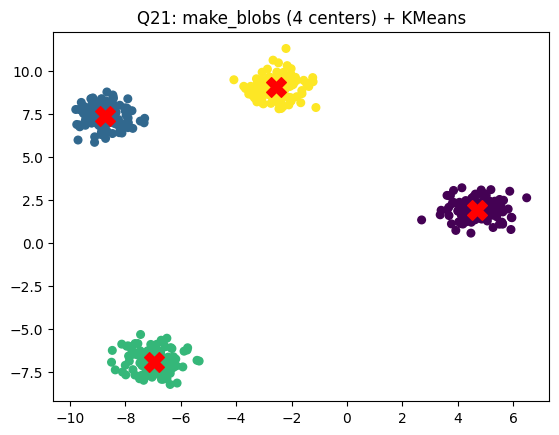

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X21, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)
kmeans21 = KMeans(n_clusters=4, random_state=42).fit(X21)

plt.scatter(X21[:, 0], X21[:, 1], c=kmeans21.labels_, cmap='viridis', s=30)
plt.scatter(kmeans21.cluster_centers_[:, 0], kmeans21.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("Q21: make_blobs (4 centers) + KMeans")
plt.show()


Q22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris22 = load_iris()
agg22 = AgglomerativeClustering(n_clusters=3).fit(iris22.data)
print("First 10 Agglomerative predicted labels (Iris):", agg22.labels_[:10])


First 10 Agglomerative predicted labels (Iris): [1 1 1 1 1 1 1 1 1 1]


Q23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

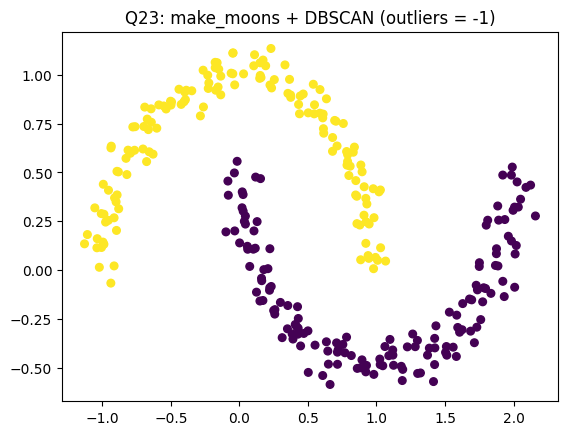

In [4]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X23, _ = make_moons(n_samples=300, noise=0.06, random_state=42)
db23 = DBSCAN(eps=0.2, min_samples=5).fit(X23)
labels23 = db23.labels_

plt.scatter(X23[:, 0], X23[:, 1], c=labels23, cmap='viridis', s=30)
plt.title("Q23: make_moons + DBSCAN (outliers = -1)")
plt.show()


Q24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

In [5]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine24 = load_wine()
X24 = StandardScaler().fit_transform(wine24.data)
kmeans24 = KMeans(n_clusters=3, random_state=42).fit(X24)
unique24, counts24 = np.unique(kmeans24.labels_, return_counts=True)
print("Wine cluster sizes:", dict(zip(unique24, counts24)))


Wine cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


Q25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

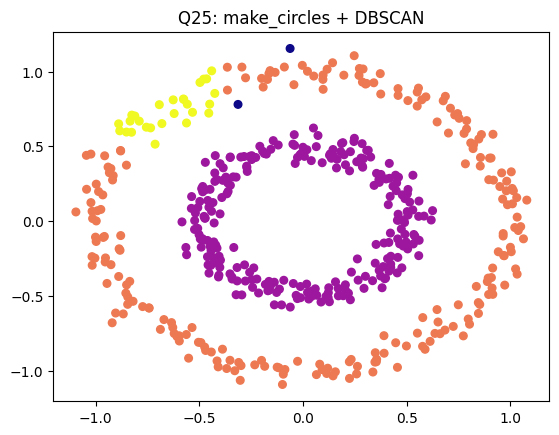

In [6]:
from sklearn.datasets import make_circles

X25, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)
db25 = DBSCAN(eps=0.12, min_samples=5).fit(X25)

plt.scatter(X25[:, 0], X25[:, 1], c=db25.labels_, cmap='plasma', s=30)
plt.title("Q25: make_circles + DBSCAN")
plt.show()


Q26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

bc26 = load_breast_cancer()
X26 = MinMaxScaler().fit_transform(bc26.data)
kmeans26 = KMeans(n_clusters=2, random_state=42).fit(X26)
print("Cluster centroids:\n", kmeans26.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


Q27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

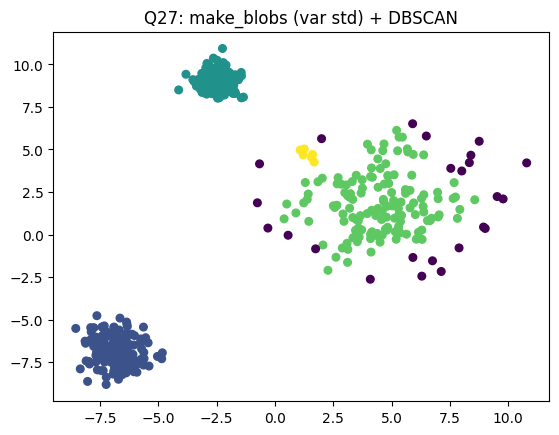

In [8]:
X27, _ = make_blobs(n_samples=500, centers=3, cluster_std=[0.5, 2.0, 0.8], random_state=42)
db27 = DBSCAN(eps=0.9, min_samples=5).fit(X27)

plt.scatter(X27[:, 0], X27[:, 1], c=db27.labels_, cmap='viridis', s=30)
plt.title("Q27: make_blobs (var std) + DBSCAN")
plt.show()


Q28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

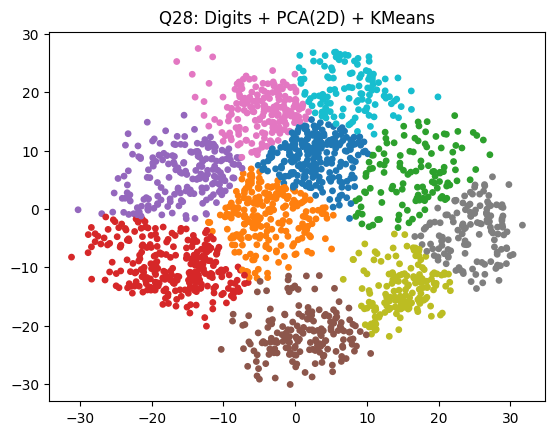

In [9]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits28 = load_digits()
X28 = PCA(n_components=2, random_state=42).fit_transform(digits28.data)
kmeans28 = KMeans(n_clusters=10, random_state=42).fit(X28)

plt.scatter(X28[:, 0], X28[:, 1], c=kmeans28.labels_, cmap='tab10', s=15)
plt.title("Q28: Digits + PCA(2D) + KMeans")
plt.show()


Q29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

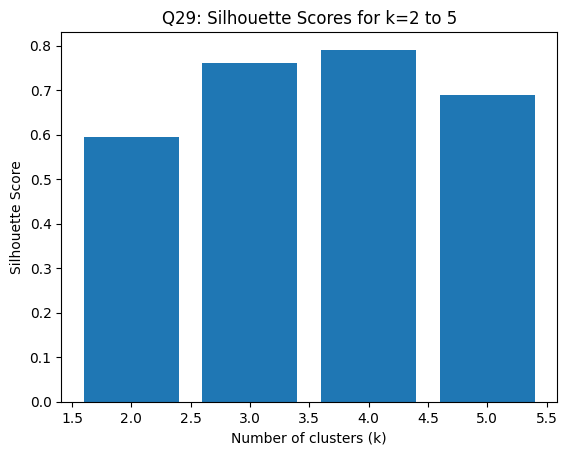

In [10]:
from sklearn.metrics import silhouette_score

X29, _ = make_blobs(n_samples=500, centers=4, random_state=42)
scores29 = []
for k in range(2, 6):
    kmeans29 = KMeans(n_clusters=k, random_state=42).fit(X29)
    scores29.append(silhouette_score(X29, kmeans29.labels_))

plt.bar(range(2, 6), scores29)
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Q29: Silhouette Scores for k=2 to 5")
plt.show()


Q30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

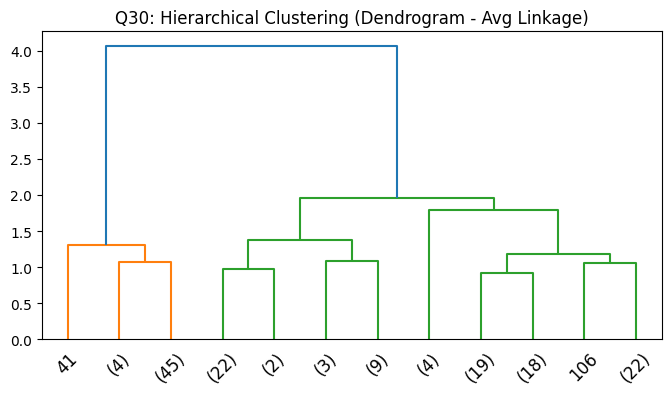

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

iris30 = load_iris()
linkage30 = linkage(iris30.data, method='average')
plt.figure(figsize=(8, 4))
dendrogram(linkage30, truncate_mode="lastp", p=12, leaf_rotation=45)
plt.title("Q30: Hierarchical Clustering (Dendrogram - Avg Linkage)")
plt.show()


Q31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

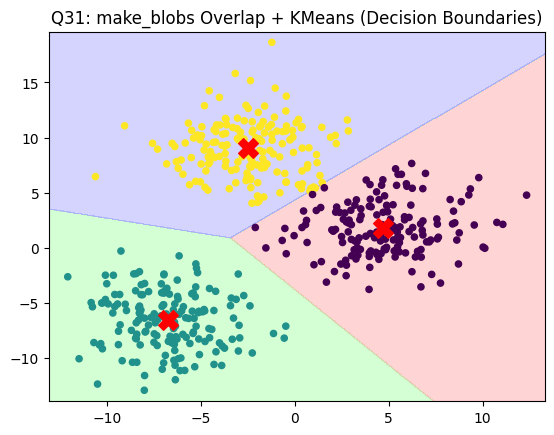

In [12]:
from matplotlib.colors import ListedColormap

X31, _ = make_blobs(n_samples=500, centers=3, cluster_std=2.5, random_state=42)
kmeans31 = KMeans(n_clusters=3, random_state=42).fit(X31)

# Decision boundary
x_min, x_max = X31[:, 0].min() - 1, X31[:, 0].max() + 1
y_min, y_max = X31[:, 1].min() - 1, X31[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
Z = kmeans31.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"]), alpha=0.5)
plt.scatter(X31[:, 0], X31[:, 1], c=kmeans31.labels_, cmap='viridis', s=20)
plt.scatter(kmeans31.cluster_centers_[:, 0], kmeans31.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("Q31: make_blobs Overlap + KMeans (Decision Boundaries)")
plt.show()


Q32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

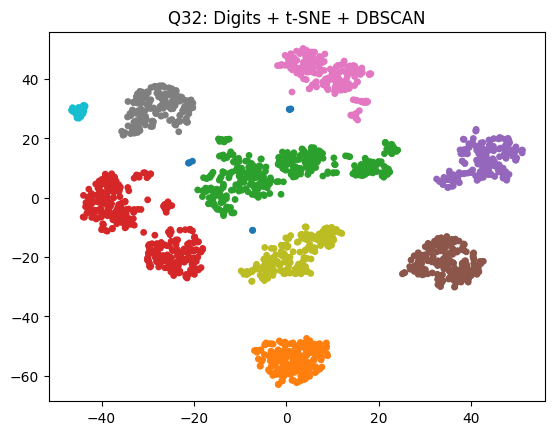

In [13]:
from sklearn.manifold import TSNE

digits32 = load_digits()
X32 = TSNE(n_components=2, random_state=42).fit_transform(digits32.data)
db32 = DBSCAN(eps=5, min_samples=5).fit(X32)

plt.scatter(X32[:, 0], X32[:, 1], c=db32.labels_, cmap='tab10', s=15)
plt.title("Q32: Digits + t-SNE + DBSCAN")
plt.show()


Q33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

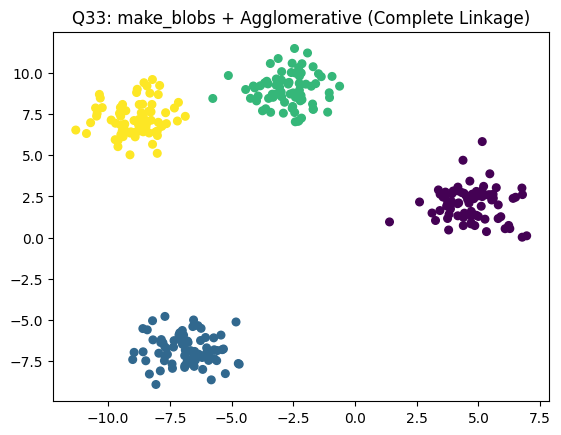

In [14]:
X33, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg33 = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X33)

plt.scatter(X33[:, 0], X33[:, 1], c=agg33.labels_, cmap='viridis', s=30)
plt.title("Q33: make_blobs + Agglomerative (Complete Linkage)")
plt.show()


Q34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

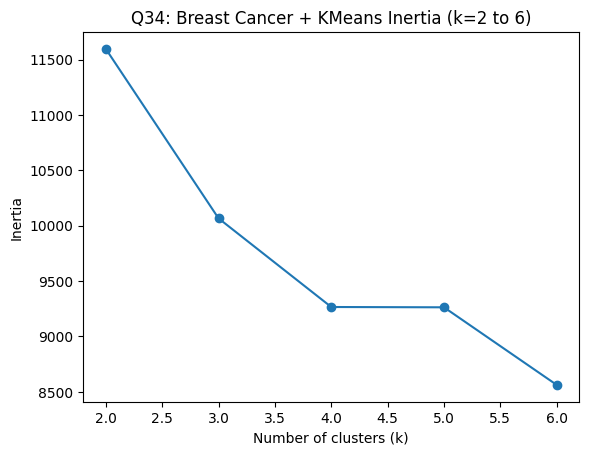

In [15]:
bc34 = load_breast_cancer()
X34 = StandardScaler().fit_transform(bc34.data)

inertia34 = []
for k in range(2, 7):
    kmeans34 = KMeans(n_clusters=k, random_state=42).fit(X34)
    inertia34.append(kmeans34.inertia_)

plt.plot(range(2, 7), inertia34, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Q34: Breast Cancer + KMeans Inertia (k=2 to 6)")
plt.show()


Q35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

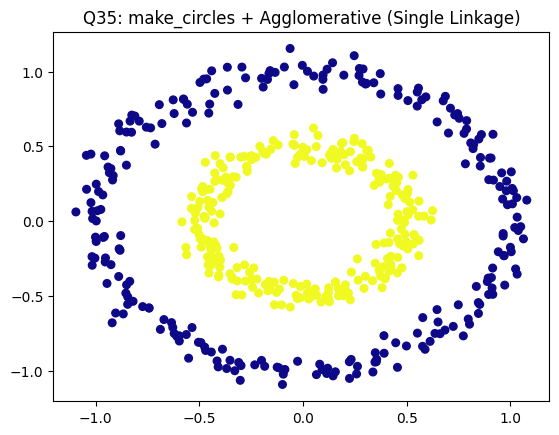

In [16]:
X35, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)
agg35 = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X35)

plt.scatter(X35[:, 0], X35[:, 1], c=agg35.labels_, cmap='plasma', s=30)
plt.title("Q35: make_circles + Agglomerative (Single Linkage)")
plt.show()


Q36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

In [17]:
wine36 = load_wine()
X36 = StandardScaler().fit_transform(wine36.data)
db36 = DBSCAN(eps=1.6, min_samples=6).fit(X36)

clusters36 = len(set(db36.labels_)) - (1 if -1 in db36.labels_ else 0)
print("Number of clusters (excluding noise):", clusters36)


Number of clusters (excluding noise): 1


Q37. Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

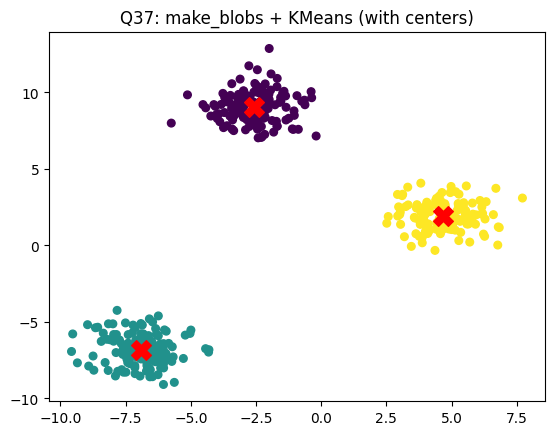

In [18]:
X37, _ = make_blobs(n_samples=400, centers=3, random_state=42)
kmeans37 = KMeans(n_clusters=3, random_state=42).fit(X37)

plt.scatter(X37[:, 0], X37[:, 1], c=kmeans37.labels_, cmap='viridis', s=30)
plt.scatter(kmeans37.cluster_centers_[:, 0], kmeans37.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.title("Q37: make_blobs + KMeans (with centers)")
plt.show()


Q38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [19]:
iris38 = load_iris()
X38 = StandardScaler().fit_transform(iris38.data)
db38 = DBSCAN(eps=0.8, min_samples=5).fit(X38)

noise_count38 = list(db38.labels_).count(-1)
print("Number of noise points in Iris DBSCAN:", noise_count38)


Number of noise points in Iris DBSCAN: 4


Q39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

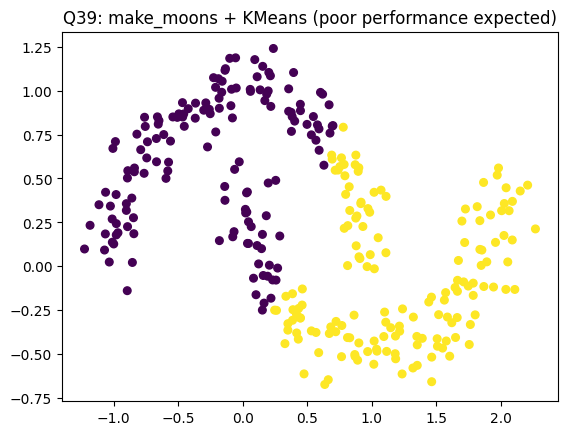

In [20]:
X39, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans39 = KMeans(n_clusters=2, random_state=42).fit(X39)

plt.scatter(X39[:, 0], X39[:, 1], c=kmeans39.labels_, cmap='viridis', s=30)
plt.title("Q39: make_moons + KMeans (poor performance expected)")
plt.show()


Q40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot

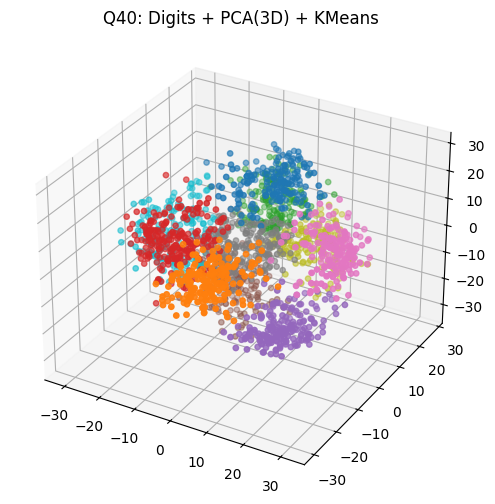

In [21]:
from mpl_toolkits.mplot3d import Axes3D

digits40 = load_digits()
X40 = PCA(n_components=3, random_state=42).fit_transform(digits40.data)
kmeans40 = KMeans(n_clusters=10, random_state=42).fit(X40)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X40[:, 0], X40[:, 1], X40[:, 2], c=kmeans40.labels_, cmap='tab10', s=15)
ax.set_title("Q40: Digits + PCA(3D) + KMeans")
plt.show()


Q41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

In [22]:
from sklearn.metrics import silhouette_score

X41, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.8, random_state=42)
kmeans41 = KMeans(n_clusters=5, random_state=42).fit(X41)

sil41 = silhouette_score(X41, kmeans41.labels_)
print("Q41: Silhouette Score =", sil41)


Q41: Silhouette Score = 0.7339390928706291


Q42. Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

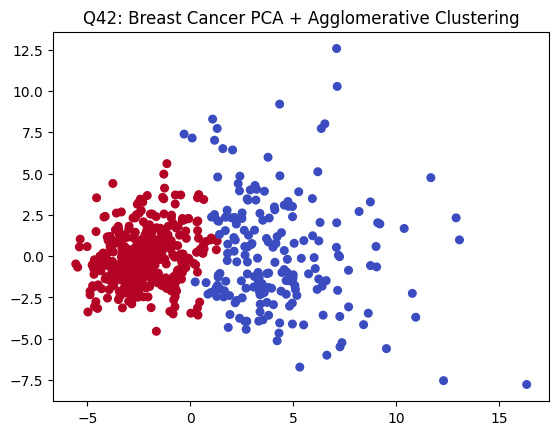

In [23]:
from sklearn.decomposition import PCA

bc42 = load_breast_cancer()
X42 = StandardScaler().fit_transform(bc42.data)
X42_pca = PCA(n_components=2).fit_transform(X42)

agg42 = AgglomerativeClustering(n_clusters=2).fit(X42_pca)

plt.scatter(X42_pca[:, 0], X42_pca[:, 1], c=agg42.labels_, cmap='coolwarm', s=30)
plt.title("Q42: Breast Cancer PCA + Agglomerative Clustering")
plt.show()


Q43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

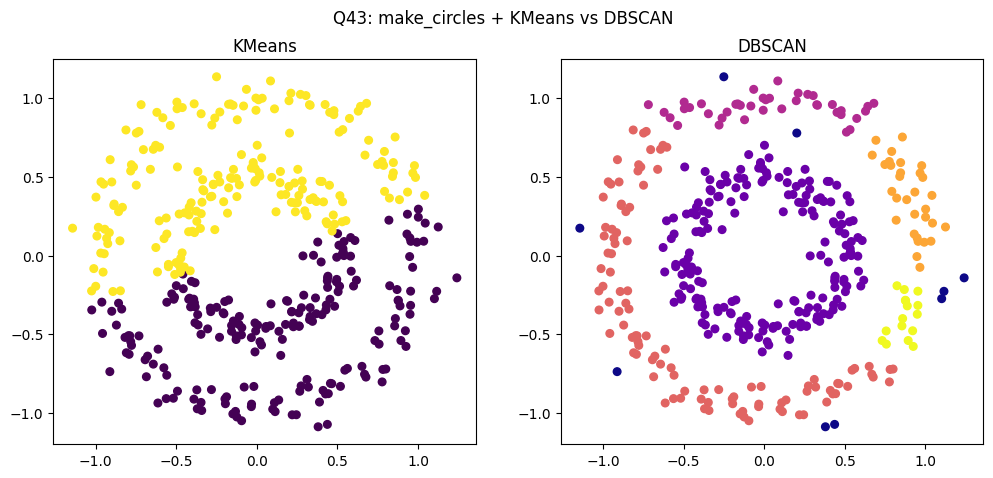

In [24]:
X43, _ = make_circles(n_samples=400, factor=0.5, noise=0.08, random_state=42)

kmeans43 = KMeans(n_clusters=2, random_state=42).fit(X43)
db43 = DBSCAN(eps=0.15, min_samples=5).fit(X43)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X43[:, 0], X43[:, 1], c=kmeans43.labels_, cmap='viridis', s=30)
ax[0].set_title("KMeans")
ax[1].scatter(X43[:, 0], X43[:, 1], c=db43.labels_, cmap='plasma', s=30)
ax[1].set_title("DBSCAN")
plt.suptitle("Q43: make_circles + KMeans vs DBSCAN")
plt.show()


Q44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

Q44: Average Silhouette Score = 0.551191604619592


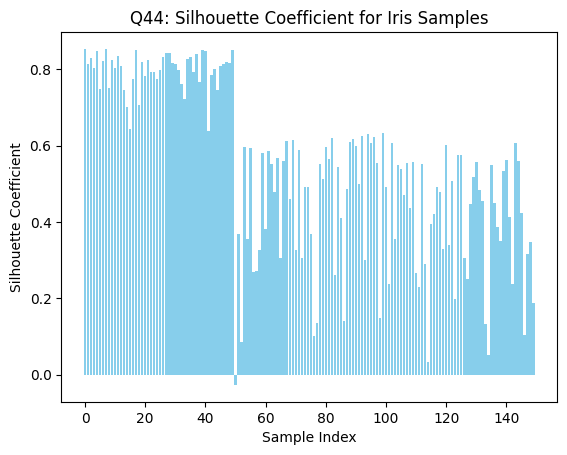

In [25]:
iris44 = load_iris()
X44 = iris44.data

kmeans44 = KMeans(n_clusters=3, random_state=42).fit(X44)
sil_samples44 = silhouette_score(X44, kmeans44.labels_, sample_size=None)

print("Q44: Average Silhouette Score =", sil_samples44)

from sklearn.metrics import silhouette_samples
sample_values44 = silhouette_samples(X44, kmeans44.labels_)

plt.bar(range(len(sample_values44)), sample_values44, color='skyblue')
plt.title("Q44: Silhouette Coefficient for Iris Samples")
plt.xlabel("Sample Index")
plt.ylabel("Silhouette Coefficient")
plt.show()


Q45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

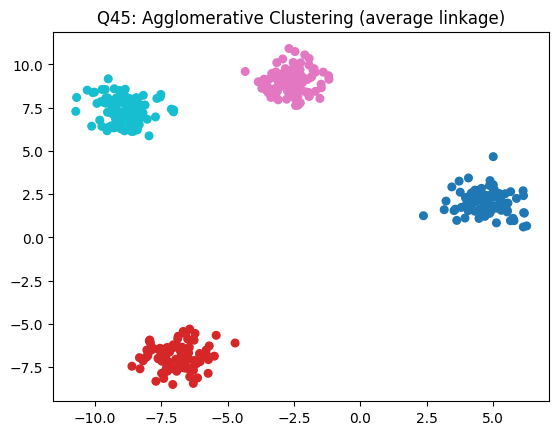

In [26]:
X45, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.7, random_state=42)
agg45 = AgglomerativeClustering(n_clusters=4, linkage='average').fit(X45)

plt.scatter(X45[:, 0], X45[:, 1], c=agg45.labels_, cmap='tab10', s=30)
plt.title("Q45: Agglomerative Clustering (average linkage)")
plt.show()


Q46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)

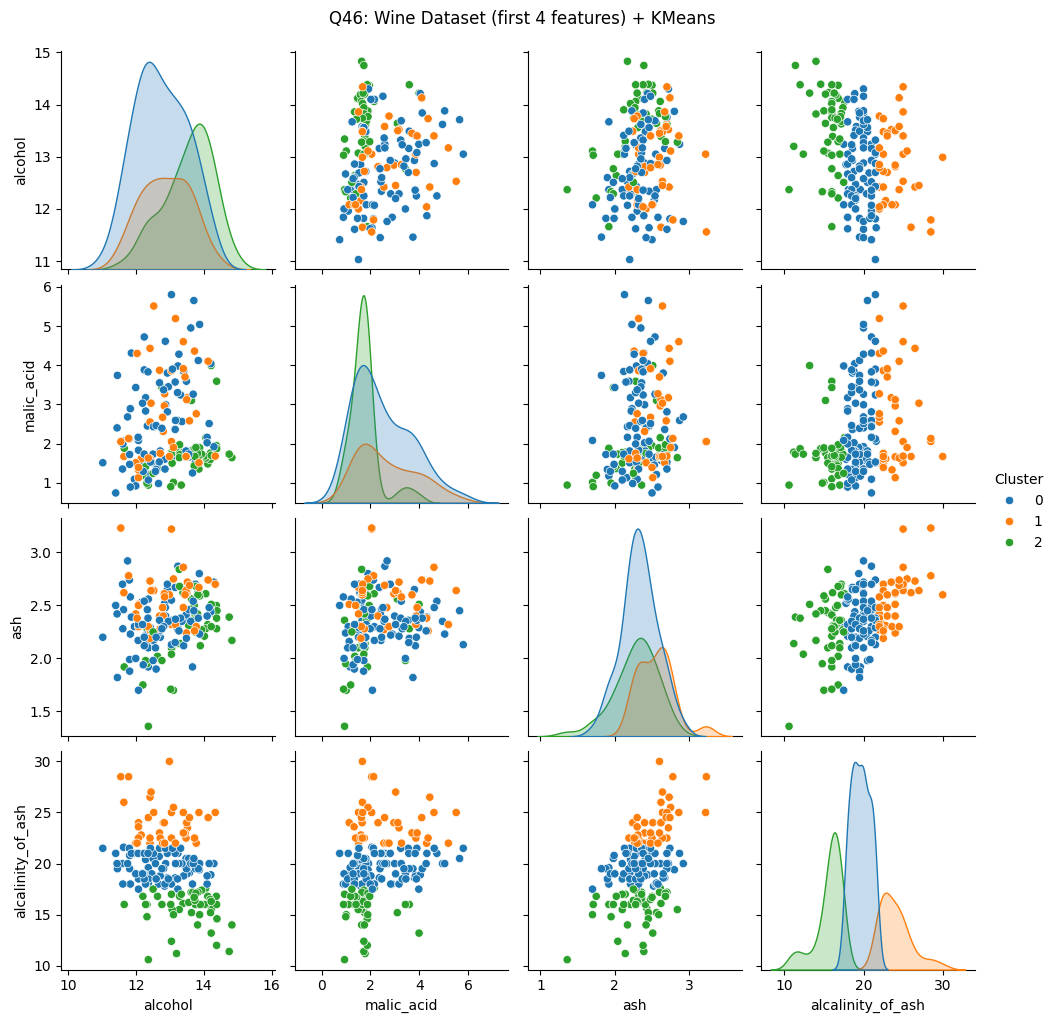

In [27]:
import seaborn as sns
import pandas as pd

wine46 = load_wine()
X46 = wine46.data[:, :4]   # first 4 features only
kmeans46 = KMeans(n_clusters=3, random_state=42).fit(X46)

df46 = pd.DataFrame(X46, columns=wine46.feature_names[:4])
df46['Cluster'] = kmeans46.labels_

sns.pairplot(df46, hue="Cluster", diag_kind="kde", palette="tab10")
plt.suptitle("Q46: Wine Dataset (first 4 features) + KMeans", y=1.02)
plt.show()


Q47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

In [28]:
X47, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=42)
db47 = DBSCAN(eps=0.9, min_samples=10).fit(X47)

labels47 = db47.labels_
n_clusters47 = len(set(labels47)) - (1 if -1 in labels47 else 0)
n_noise47 = list(labels47).count(-1)

print(f"Q47: Clusters = {n_clusters47}, Noise points = {n_noise47}")


Q47: Clusters = 3, Noise points = 74


Q48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters

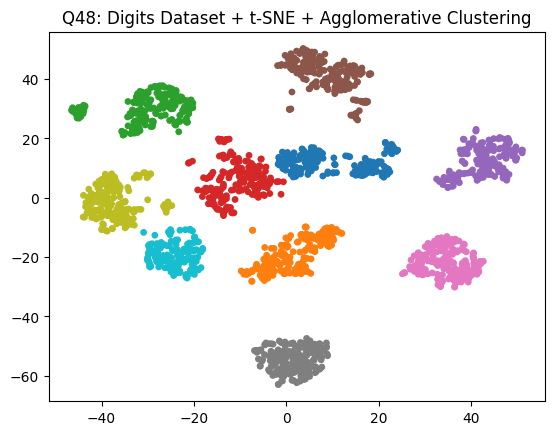

In [29]:
from sklearn.manifold import TSNE

digits48 = load_digits()
X48 = digits48.data
X48_tsne = TSNE(n_components=2, random_state=42).fit_transform(X48)

agg48 = AgglomerativeClustering(n_clusters=10).fit(X48_tsne)

plt.scatter(X48_tsne[:, 0], X48_tsne[:, 1], c=agg48.labels_, cmap='tab10', s=15)
plt.title("Q48: Digits Dataset + t-SNE + Agglomerative Clustering")
plt.show()
